In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-19T12:54:02.623911+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

nicaviz: 0.0.4
seaborn: 0.10.1
pandas : 1.2.3
numpy  : 1.18.1



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_small,cont_rand,cont_uni,date,timestamp
2040,1,6,f,red,4.816217,23.101753,2023-08-03,2018-02-13 15:28:09
1394,1,1,b,red,9.403308,15.395899,2021-10-26,2018-01-10 03:52:18
1615,3,18,g,blue,5.049548,-17.978409,2022-06-04,2018-01-16 06:02:08
1181,3,7,e,blue,0.170837,-8.473435,2021-03-27,2018-01-23 05:18:39
2685,1,14,c,red,7.190516,-4.099613,2025-05-09,2018-02-19 04:10:06
1048,3,4,e,red,0.906673,-7.182653,2020-11-14,2018-01-04 11:37:08
4393,0,12,e,red,9.026357,-6.556938,2030-01-11,2018-02-15 00:08:35
2264,2,8,d,red,5.695994,2.663154,2024-03-14,2018-01-25 01:18:54
395,0,13,f,blue,0.221454,-4.038133,2019-01-31,2018-02-01 22:32:35
3765,4,0,f,blue,5.184684,3.018509,2028-04-23,2018-01-03 21:51:50


In [4]:
dir(df.nica)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calc_rows',
 '_estimate_figsize',
 '_get_plot_func',
 '_gridparams',
 '_obj',
 'categorical_describe',
 'clean_str_arr',
 'custom_distplot',
 'get_corr_matrix',
 'mass_plot',
 'multi_plot',
 'plot_cloud',
 'prepare_title',
 'rank_correlations_plots',
 'regplot',
 'resample_data',
 'single_bar',
 'ts_resample',
 'ts_resample_plot',
 'ts_rolling',
 'ts_rolling_plot']

In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 8 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,2,1053,3,1035,0,985.0,1,972.0,4,955.0
int_med,20,0,int64,9,282,14,267,15,266.0,10,262.0,4,259.0
str_med,7,0,object,a,746,f,722,d,722.0,e,717.0,g,706.0
str_small,2,0,object,red,2516,blue,2484,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,7.785954,1,4.200955,1,1.21697,1.0,1.943905,1.0,5.190718,1.0
cont_uni,5000,0,float64,-3.447924,1,9.925593,1,-19.329046,1.0,-8.058011,1.0,3.762382,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0
timestamp,4997,0,datetime64[ns],2018-01-14 15:29:24,2,2018-01-01 21:51:10,2,2018-01-24 05:32:01,2.0,2018-02-21 17:32:21,1.0,2018-02-03 17:18:20,1.0


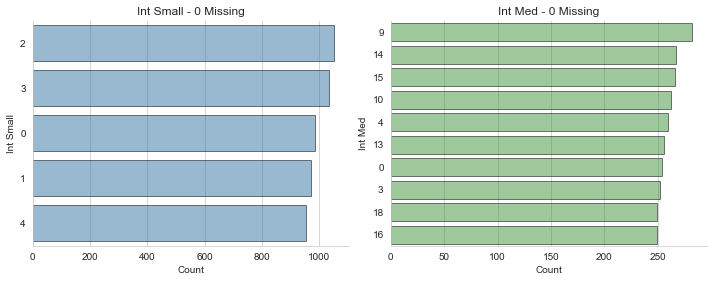

In [6]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

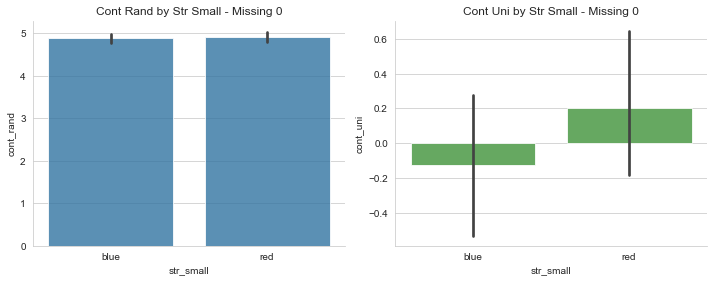

In [7]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    x_var = "str_small",
    plottype = "bar")

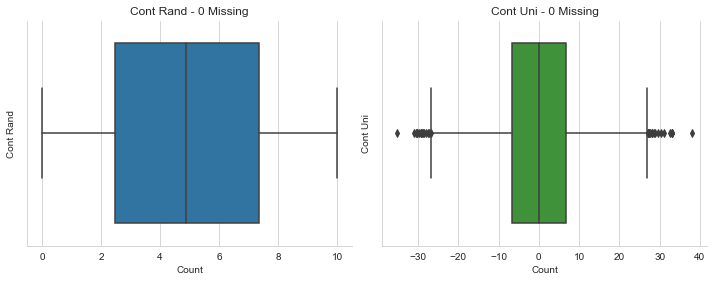

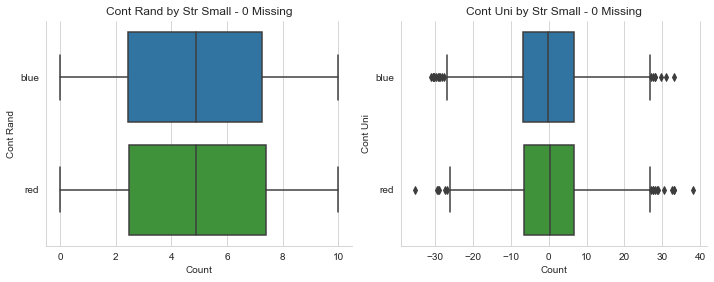

In [8]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "boxplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "boxplot")

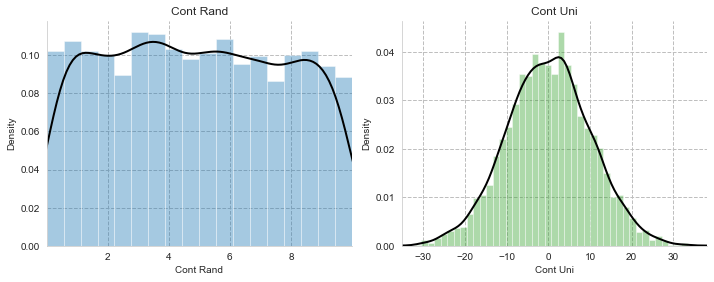

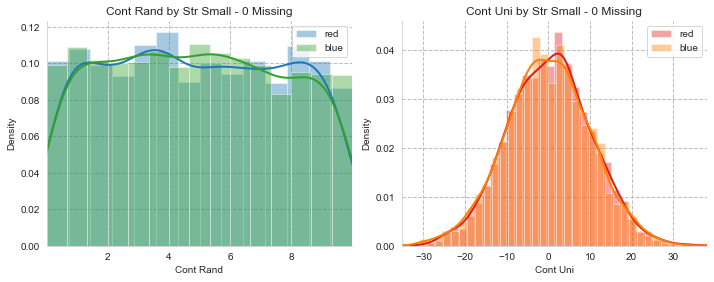

In [9]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "distplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "distplot")

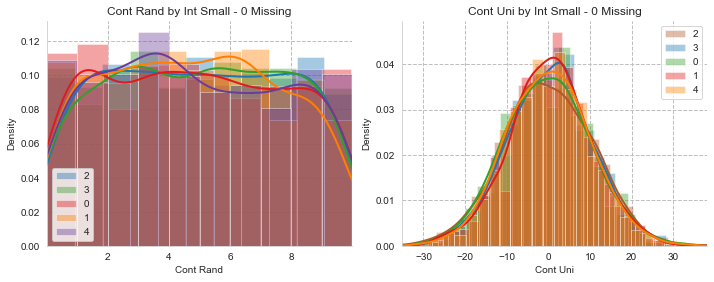

In [10]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "int_small",
    plottype = "distplot")

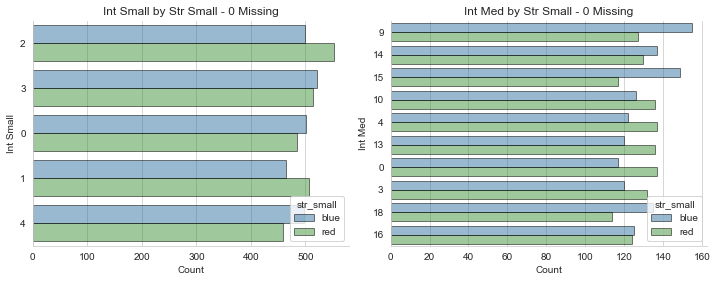

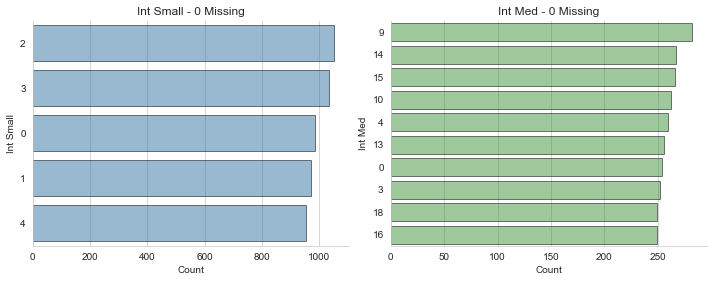

In [11]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    hue = "str_small",
    plottype = "countplot")

df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

### Time Series

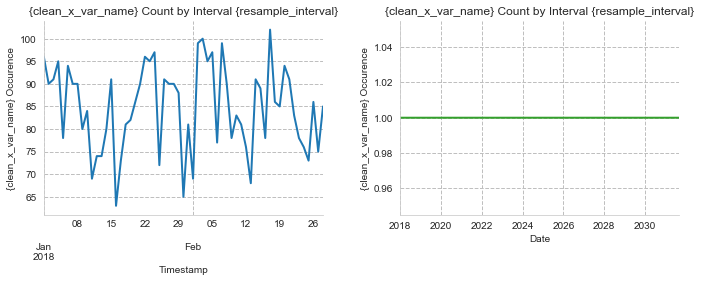

In [12]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    resample_interval="1D"
)

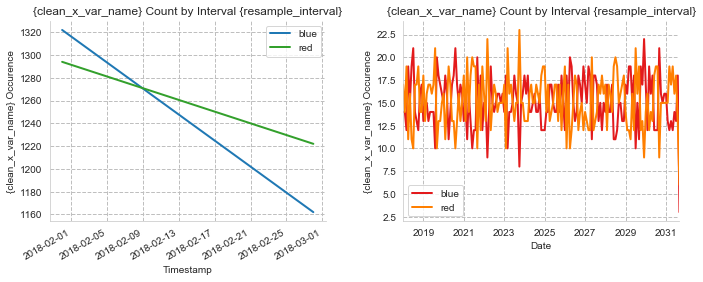

In [13]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    hue = "str_small",
    resample_interval="1M"
)

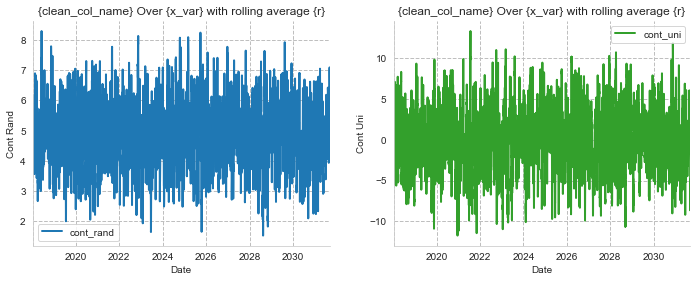

In [14]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    x_var="date",
    rolling=True,
    r=7
)

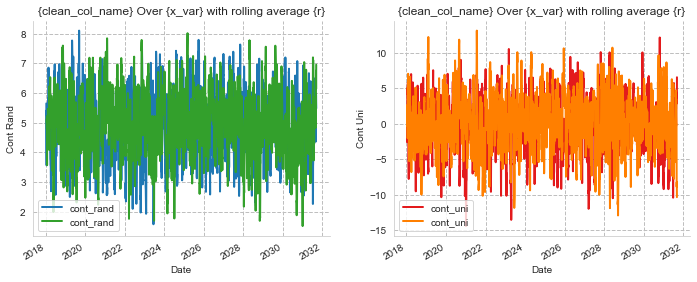

In [15]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    hue = "str_small",
    x_var="date",
    rolling=True,
    r=7
)

### WordClouds

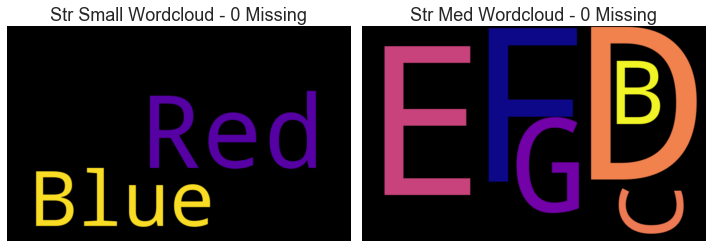

In [16]:
df.nica.mass_plot(
    plt_set= ["str_small", "str_med"],
    plottype = "wordcloud")

### Rank Correlations

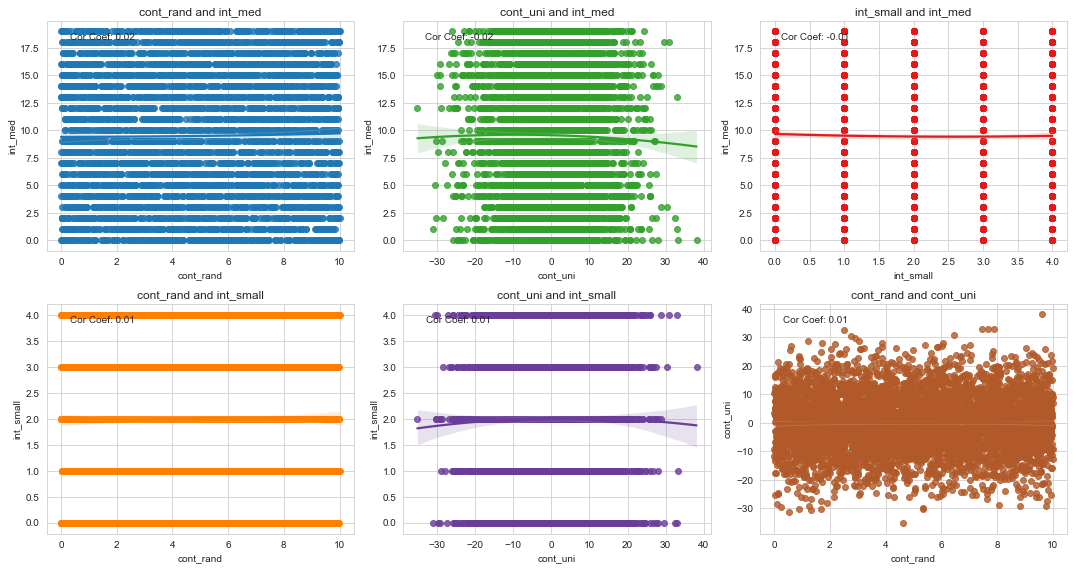

In [17]:
df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)